# Regression and Classification Assignment

This notebook uses the data discussed in regression_and_classification notebook.   You may want to review that if you
have trouble with the assignment.

## 1. The data

First we do some imports and load the data from the `sklearn` module.

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import numpy as np


data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

**Q1**

Don't take my word for it that subsets of the 4 Iris features always produce a worse classifier.
Try it out.

Change the selector array in the next cell and execute the code
in the cell to try out your own favorite subsets
of features.  No subset of 2 or even 3 features performs as well as using all 4.

For example, using this selector 
```
selector = np.array([True,True,False,True])
```

leaves out just  the third feature.  Here's your challenge: Find the best 2-feature
system (it performs almost as well as any 3-feature system), and the best
3-feature system.  Hint for the 2-feature problem, if you want to get there more
quickly.  Look at our plots of two-feature systems in the "Plotting Attributes" section of the regression_and_classification.ipynb notebook (Section 2).  Which one **looks**
like it gives the best separation?

In [59]:
#Use selected features
selector = np.array([True,True,False,True])
X = features[:,selector]
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

0.9666666666666667

In [62]:
# See the features in order
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
# From the plots in the regression_and_classification.ipynb notebook, I found sepalLength_petalLength to be the most accurate
# This is the best 2-feature system with the accuracy of 96.66666666666667%
selector_2 = np.array([True,False,True,False])
X = features[:,selector_2]
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

0.9666666666666667

In [78]:
# This is the best 3-feature system (sepal width, petal length, petal width OR sepal length, petal length, petal width) 
# with the accuracy of 98%
selector_3 = np.array([True,False,True,True]) # selector_3 = np.array([False,True,True,True])
X = features[:,selector_3]
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

0.98

**Q2**

In the regression_and_classification notebook, 
we implemented a function called `is_non_red` that is supposed to distinguish 
class 0 from classes 1 and 2.  Here is the definition and an example of using it
on a row of the Iris dataset.

## 2.  The questions

In [83]:
def is_non_red (P):
    """
    P is a data point, all 4 attributes.
    
    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) > 0

P = features[-90]
print('P is in positive class: {0}'.format(is_non_red(P)))

P is in positive class: True


We call such a function a model (a model of `non-redness`). Write some code to evaluate this model's accuracy 
in predicting non redness.  Before calling the `accuracy_score` function, 
you will have to compute `predicted` using `is_non_red` to give you an array of predictions


To create a prediction array using `is_non_red`, apply it to every row
of `features`:

```
np.apply_along_axis(is_non_red, axis=1, arr= features)
```

You will also have to evaluate accuracy against a different standard.
You can't evaluate against the class array `target` defined above
because that has three classes and `is_non_red` essentially works with two. 
You have to start by creating a different
class array that only has two classes, matching the kind of results `is_non_red` produces.
The red class is 0, so you want `True` for every class 1 or 2 iris, and
`False` for every class 0 iris. For this, use a Boolean mask on `target`.

Be sure to say what your final score **means**.  Did you you do very well
or very badly?  Using scikit learn, compute a model you can compare this model to in order to know
whether you did very well or very badly. 

In [124]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [165]:
# Below I am creating an array of 2 classes, so that 0 == False, 1 == True, 2 == True
target_2_classes = ((target == 1) | (target == 2)) & ~(target == 0)
# Check the dimension
target_2_classes.shape

(150,)

In [166]:
# Make sure features and target_2_classes dimensions are compatible
features.shape

(150, 4)

In [167]:
# Prediction array is created by applying is_non_red model to every row of features
predicted = np.apply_along_axis(is_non_red, axis=1, arr= features)
accuracy_score(target_2_classes,predicted)

1.0

In [171]:
# Accuracy is 1.0, 100%
# I guess 100% accuracy is great

**Q3** 

Using the `rock vs. mines` data set loaded in the next cell, draw a scatterplot of the points like the ones we did in Section 2 and 3 of this tutorial for the iris data. 
You will find the code in Section 3 of the rfegression_and_classification notebook will require the least modification.
This data set tries to distinguish two classes, rocks and mines, based on sonar readings.
Note, as the loading code indicates, this data has 60 features, which is a lot, so you should
just pick one pair of features out and plot them.  Crucially,
you **don't** need to plot all pairs (there are 1770 pairs), even though
with 60 features, you are unlikely to have much success using just two.

When modifying the code to draw the picture, bear in mind you really only need to
scatter the points.  You are not being asked to draw a separation line,
and you don't need to draw our point P, because it doesn't appear in this data.
You should try to give the points belonging to the two classes different colors
and shapes, as was done above.

In [212]:
import pandas as pd

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks mines data
mine_df = pd.read_csv(target_url, header=None)
mine_features = mine_df.values
(samp_sz, num_feats) = mine_features.shape
print('{0} exemplars with {1} features'.format(samp_sz, num_feats))
# The last column contains the class data.  Separate it from the others.
target = mine_features[:, 60]
# Everything else is a feature
mine_features = mine_features[:, :60]
(samp_sz, num_feats) = mine_features.shape

# Find the two classes we're trying to separate.
feat_set = list(set(target))
print('{0} classes: {1}'.format(len(feat_set), feat_set))

208 exemplars with 61 features
2 classes: ['M', 'R']


In [186]:
mine_features

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [193]:
target

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [259]:
feat_set

['M', 'R']

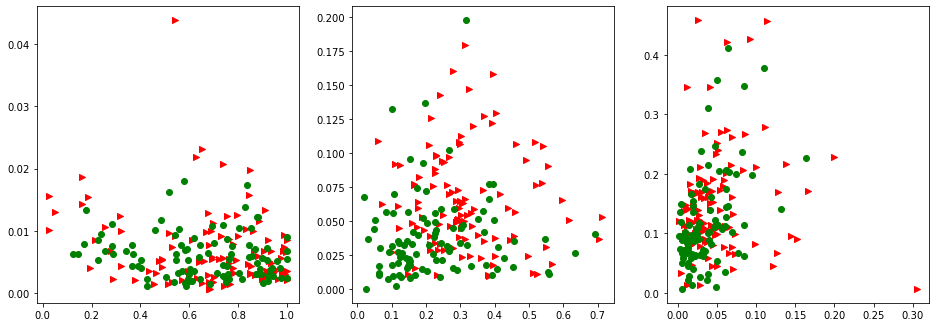

In [265]:
%matplotlib inline

import pylab 
import numpy as np
from matplotlib import pyplot as plt

# Let's make this a big figure, because there are multiple subplots
pylab.rcParams['figure.figsize'] = (16.0, 12.0)

markers, colors  = ">ox", "rgb"

# Four columns, plot two at a time.  
# Possible pairings. Could have chosen 1, but I wanted to see several of them
pairs = [(23,59), (12, 48), (2, 7)]

for i,(x,y) in enumerate(pairs):
    # 6 subplots in 2x3 configuration. Each subplot pairs two iris
    # attributes we call x and y. Let's do subplot i+1 now.
    plt.subplot(2,3,i+1)
    # On this subplot we're doing 3 sets of points, each belonging to a different iris class
    # with a different color and shape used to draw the points.  To do the 3 sets, use a loop.
    # To loop through 3 sequences at once, zip them together first
    for cls,marker,clr in zip(range(2),markers,colors):
        plt.scatter(mine_features[target == feat_set[cls],x], mine_features[target == feat_set[cls],y], marker=marker, c=clr)

# for i,(x,y) in enumerate(pairs):
#     # 6 subplots in 2x3 configuration. Each subplot pairs two iris
#     # attributes we call x and y. Let's do subplot i+1 now.
#     plt.subplot(2,3,i+1)
#     plt.scatter(mine_features[target == 'M',x], mine_features[target == 'M',y], marker=marker, c='green')
#     plt.scatter(mine_features[target == 'R',x], mine_features[target == 'R',y],  marker=marker, c='red')
        

**Q4**

Combining variables: Cheap non-linearity

The [Heidelberg stat-center](http://www.statlab.uni-heidelberg.de/data/iris/) reports a very nice result obtained by combining
the 2 petal features and the  2 sepal features by multiplication.  We end up with 2 **area** features, and a system that's almost as good as a 4-feature linear system,
at the cost of a little non-linearity (the multiplication). Here's the computation,
and the picture, both of which are very simple.  

Notice what the picture is telling us:  Petal area alone
is enough to almost perfectly perform the discrimination.  And the insight can easily be made visual.

Text(0, 0.5, 'petal area')

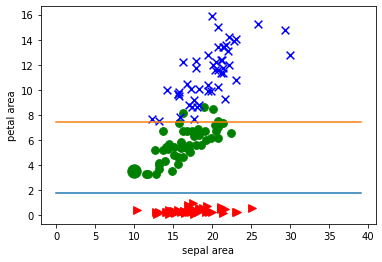

In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(sepal_area[target == t], petal_area[target == t], marker=marker, c=c,s=60) 

# Let's draw our point P with extra special attention getting large SIZE.
p_sepal_area,p_petal_area,p_target  = sepal_area[-90],petal_area[-90],target[-90]
marker,clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_sepal_area,p_petal_area,marker=marker,c=clr,s=180)

# Let;s draw some linear separators, horizontal lines in this case
plt.plot(np.arange(0.,40.),np.array([1.8]*40))
plt.plot(np.arange(0.,40.),np.array([7.4]*40))
plt.axis('tight')
plt.xlabel('sepal area')
plt.ylabel('petal area')

**Q4: Part A** 

Validate what the picture is telling you by training and evaluating a `linear_model.LogisticRegression` 
classifier that uses **only** the petal area feature.  

You can define values for `petal_area` feature by evaluating the cell.  Your
answer should be a few lines of code.  The last line should print out the
accuracy score for your classifier.

In [18]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

X = petal_area.reshape(-1, 1) # reshaping because otherwise, there is a "ValueError: Expected 2D array, got 1D array instead"
Y = target

# Create an instance of a Logistic Regression Classifier
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')
# Train the data
logreg.fit(X, Y)
# Predict
predicted = logreg.predict(X)
# Determine accuracy
accuracy_score(Y,predicted)


0.9533333333333334

**Q4: Part B** 

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses **both** the petal area feature and the sepal area feature.  
Guidelines as with the last problem.


In [27]:
# type(X)

numpy.ndarray

In [30]:
# len(X)

150

In [34]:
X_all = np.c_[petal_area.ravel(), sepal_area.ravel()]
Y = target

# Create an instance of a Logistic Regression Classifier
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')
# Train the data
logreg.fit(X_all, Y)
# Predict
predicted = logreg.predict(X_all)
# Determine accuracy
accuracy_score(Y,predicted)


0.98

In [31]:
# len(X_all)

2

In [28]:
# type(X_all)

numpy.ndarray

**Q4 Part C**

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses both  area features **as well as** the original 4 features.
Does this do better than a classifier trained on the original 4 features?


In [59]:
# X_all = np.c_[petal_area.ravel(), sepal_area.ravel(), features.ravel()]
_X_ = np.column_stack((X_all, features))
Y = target

# Create an instance of a Logistic Regression Classifier
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',multi_class='auto')
# Train the data
logreg.fit(_X_, Y)
# Predict
predicted = logreg.predict(_X_)
# Determine accuracy
accuracy_score(Y,predicted)

0.9866666666666667

In [60]:
# Looks like accuracy increased. It was 0.98 before, now it is 0.9866666666666667.
# Accuracy increased by 68%

In [48]:
# petal_area.shape

(150,)

In [49]:
# sepal_area.shape

(150,)

In [47]:
# features.shape

(150, 4)